# EDA Notebook

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/gd/h510fd1921xczd25wx4pxkkh0000gn/T/ipykernel_92069/2110692023.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
df = pd.read_csv('../data/census.csv')

In [4]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
print(df.dtypes)

age                 int64
 workclass         object
 fnlgt              int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object


In [14]:
df.columns = [
    'age', 'workclass', 'fnlgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race','sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'salary'
]

In [17]:
Categorical_vals = ['workclass', 'education', 'education-num', 'marital-status', 
                    'occupation', 'relationship', 'race','native-country',
                    'salary']

for features in Categorical_vals:
    print('Values for column {}: '.format(features), set(df[features]),', Length: ',len(set(df[features])),'\n')

Values for column workclass:  {' State-gov', ' ?', ' Without-pay', ' Self-emp-not-inc', ' Federal-gov', ' Never-worked', ' Private', ' Local-gov', ' Self-emp-inc'} , Length:  9 

Values for column education:  {' Assoc-voc', ' 12th', ' 9th', ' 10th', ' Doctorate', ' 1st-4th', ' Preschool', ' HS-grad', ' Some-college', ' Masters', ' 11th', ' 5th-6th', ' Bachelors', ' Prof-school', ' 7th-8th', ' Assoc-acdm'} , Length:  16 

Values for column education-num:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16} , Length:  16 

Values for column marital-status:  {' Married-AF-spouse', ' Separated', ' Divorced', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Widowed'} , Length:  7 

Values for column occupation:  {' ?', ' Tech-support', ' Protective-serv', ' Sales', ' Farming-fishing', ' Transport-moving', ' Exec-managerial', ' Craft-repair', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Priv-house-serv', ' Other-service', ' Armed-Forces', ' Adm-cle

In [19]:
Integer_vals = ['age', 'fnlgt',
                'capital-gain', 'capital-loss',
                'hours-per-week']


print('Summary for numerical features: \n', df[Integer_vals].describe()) 

Summary for numerical features: 
                 age         fnlgt  capital-gain  capital-loss  hours-per-week
count  32561.000000  3.256100e+04  32561.000000  32561.000000    32561.000000
mean      38.581647  1.897784e+05   1077.648844     87.303830       40.437456
std       13.640433  1.055500e+05   7385.292085    402.960219       12.347429
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      0.000000      0.000000       40.000000
75%       48.000000  2.370510e+05      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000


In [20]:
df.isna().sum()

age               0
workclass         0
fnlgt             0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [28]:
cols_to_strip = ['workclass', 'education', 'marital-status', 
                 'occupation', 'relationship', 'race',
                 'native-country','salary']

for col in cols_to_strip:
    df[col] = df[col].str.strip()

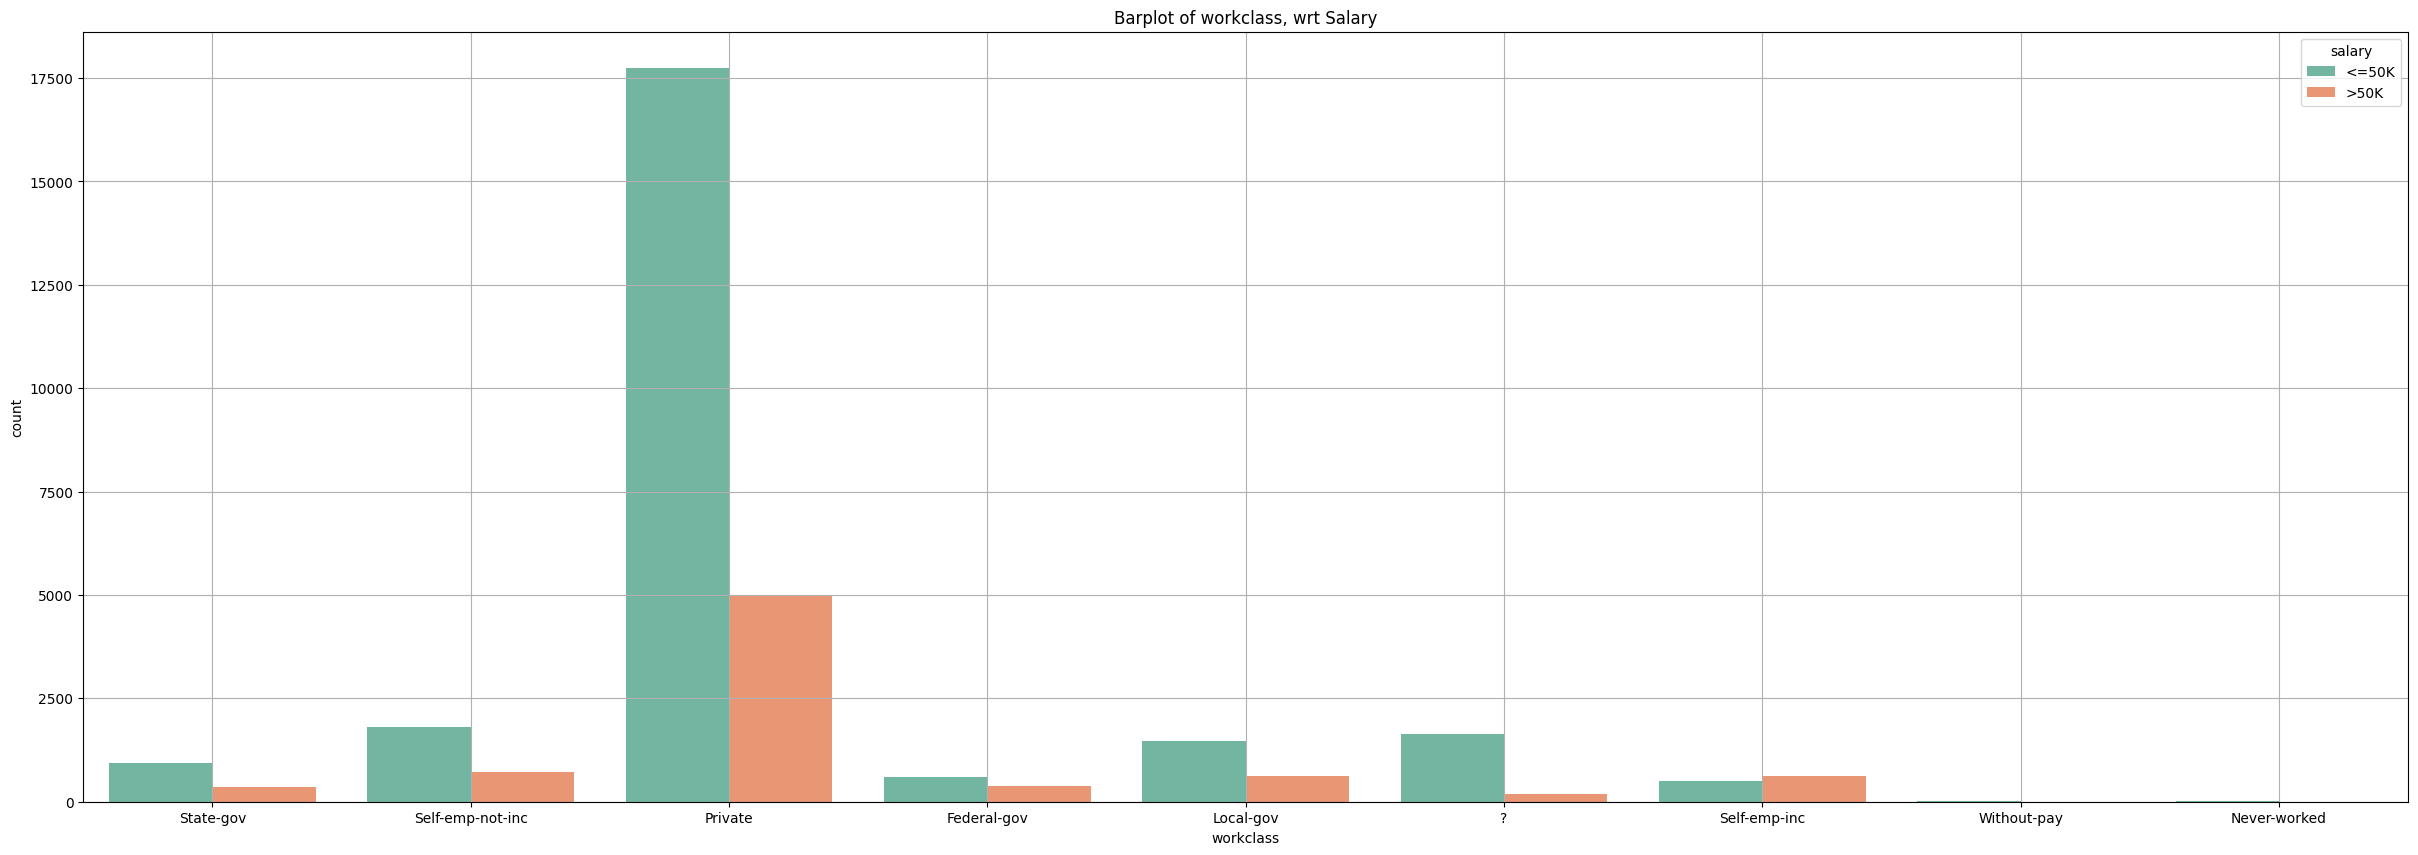

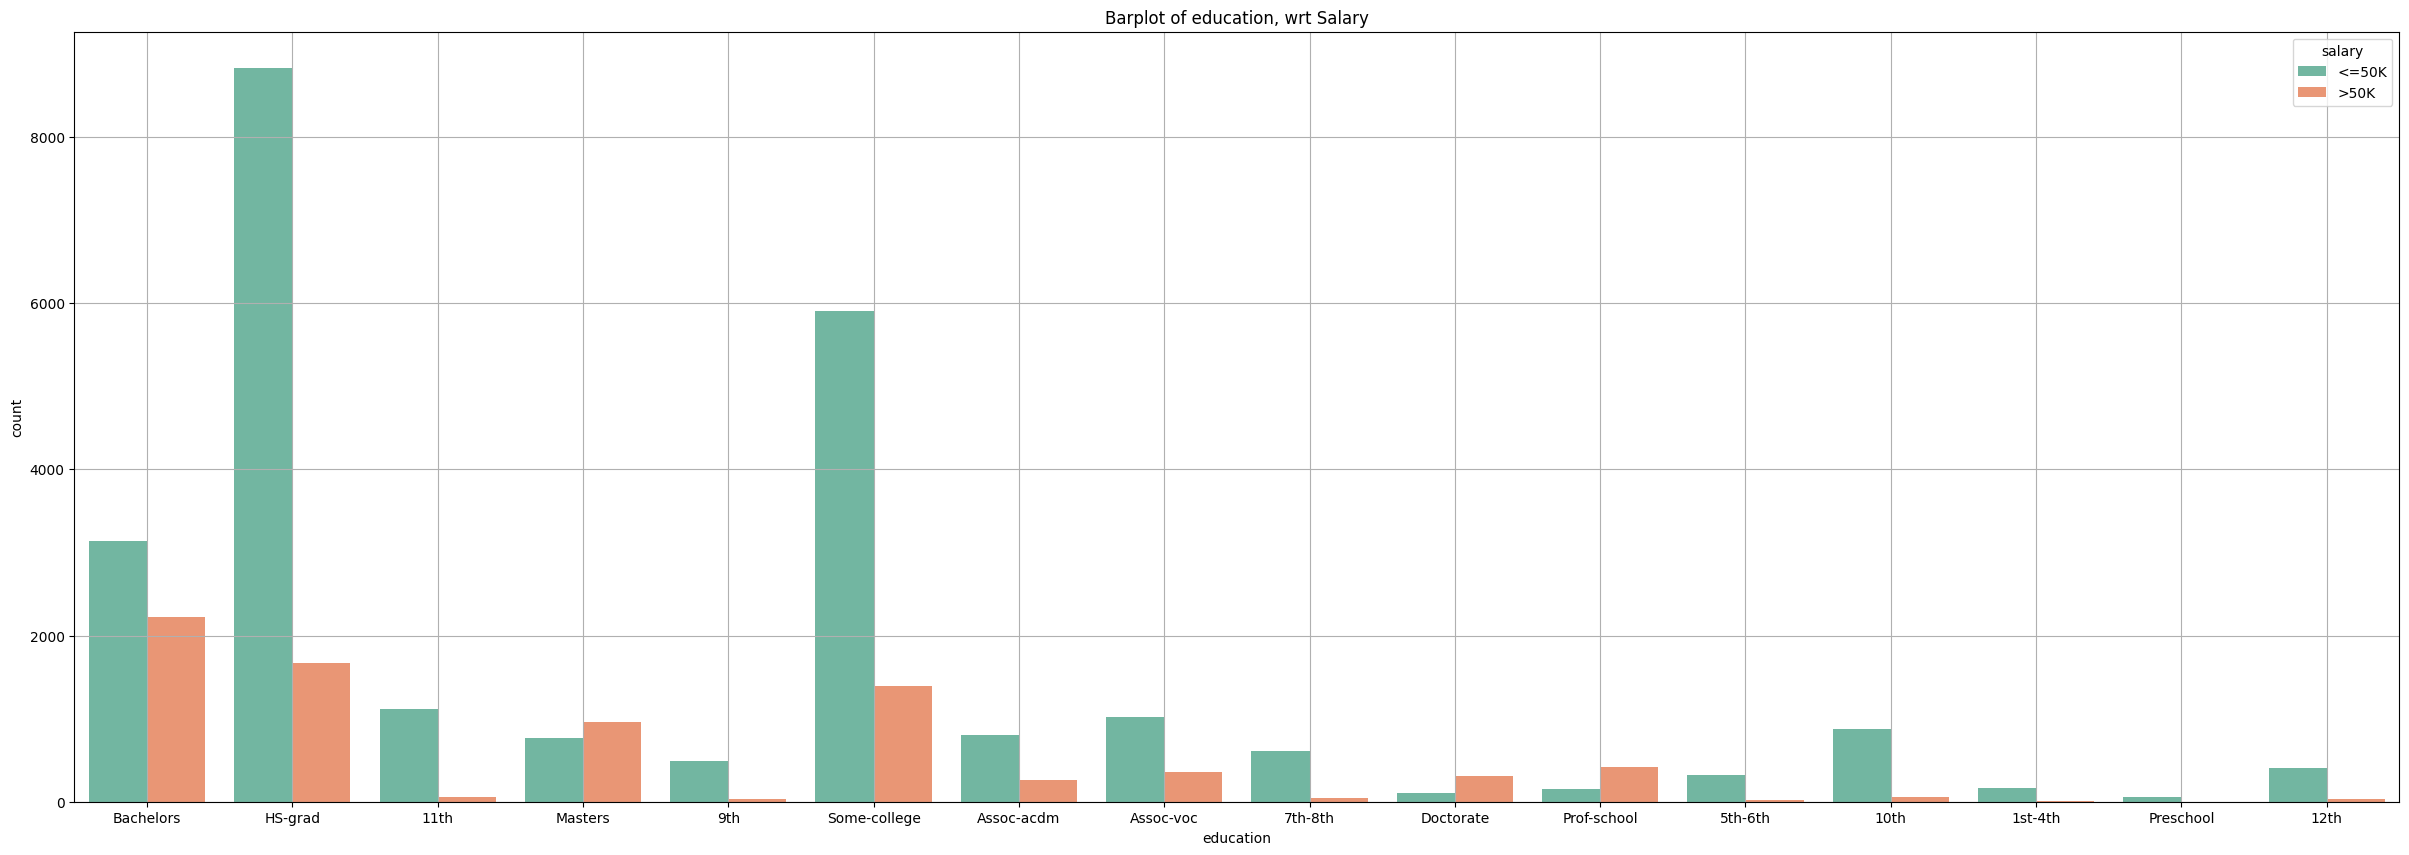

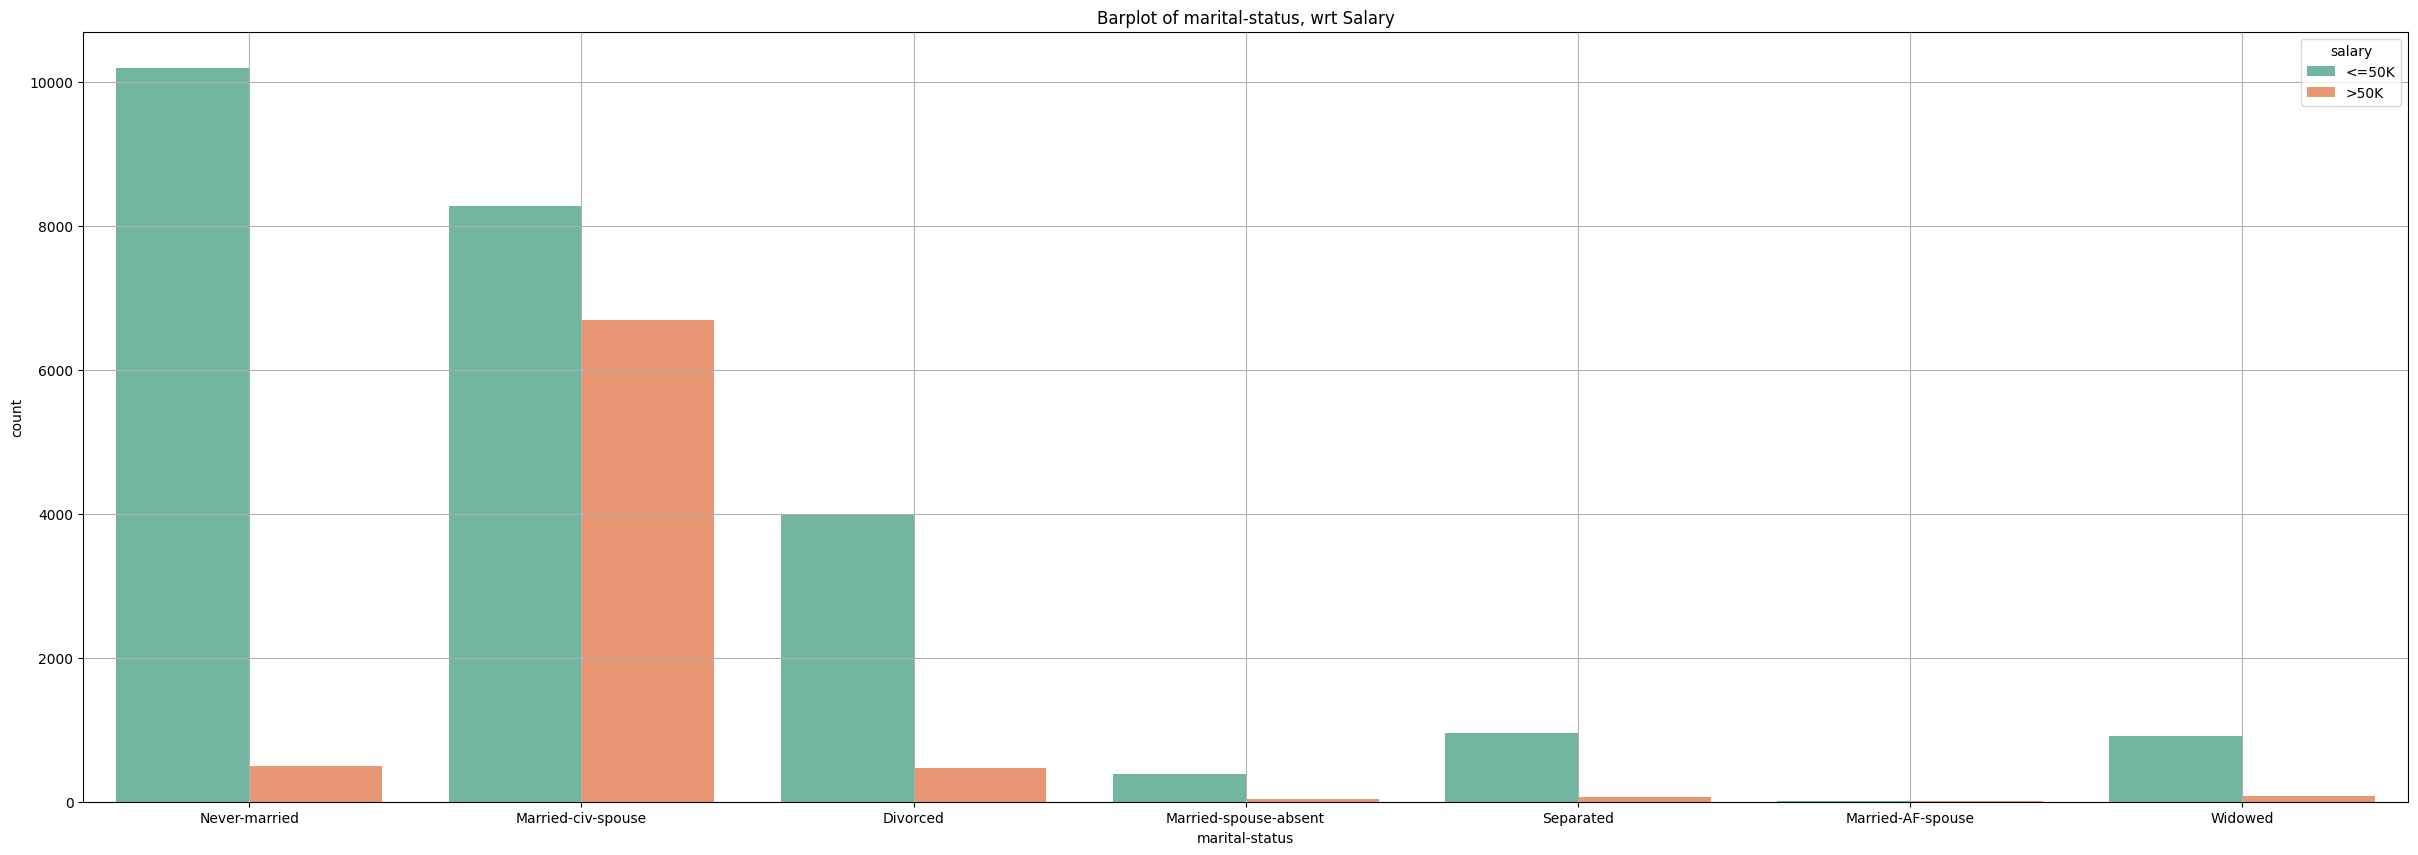

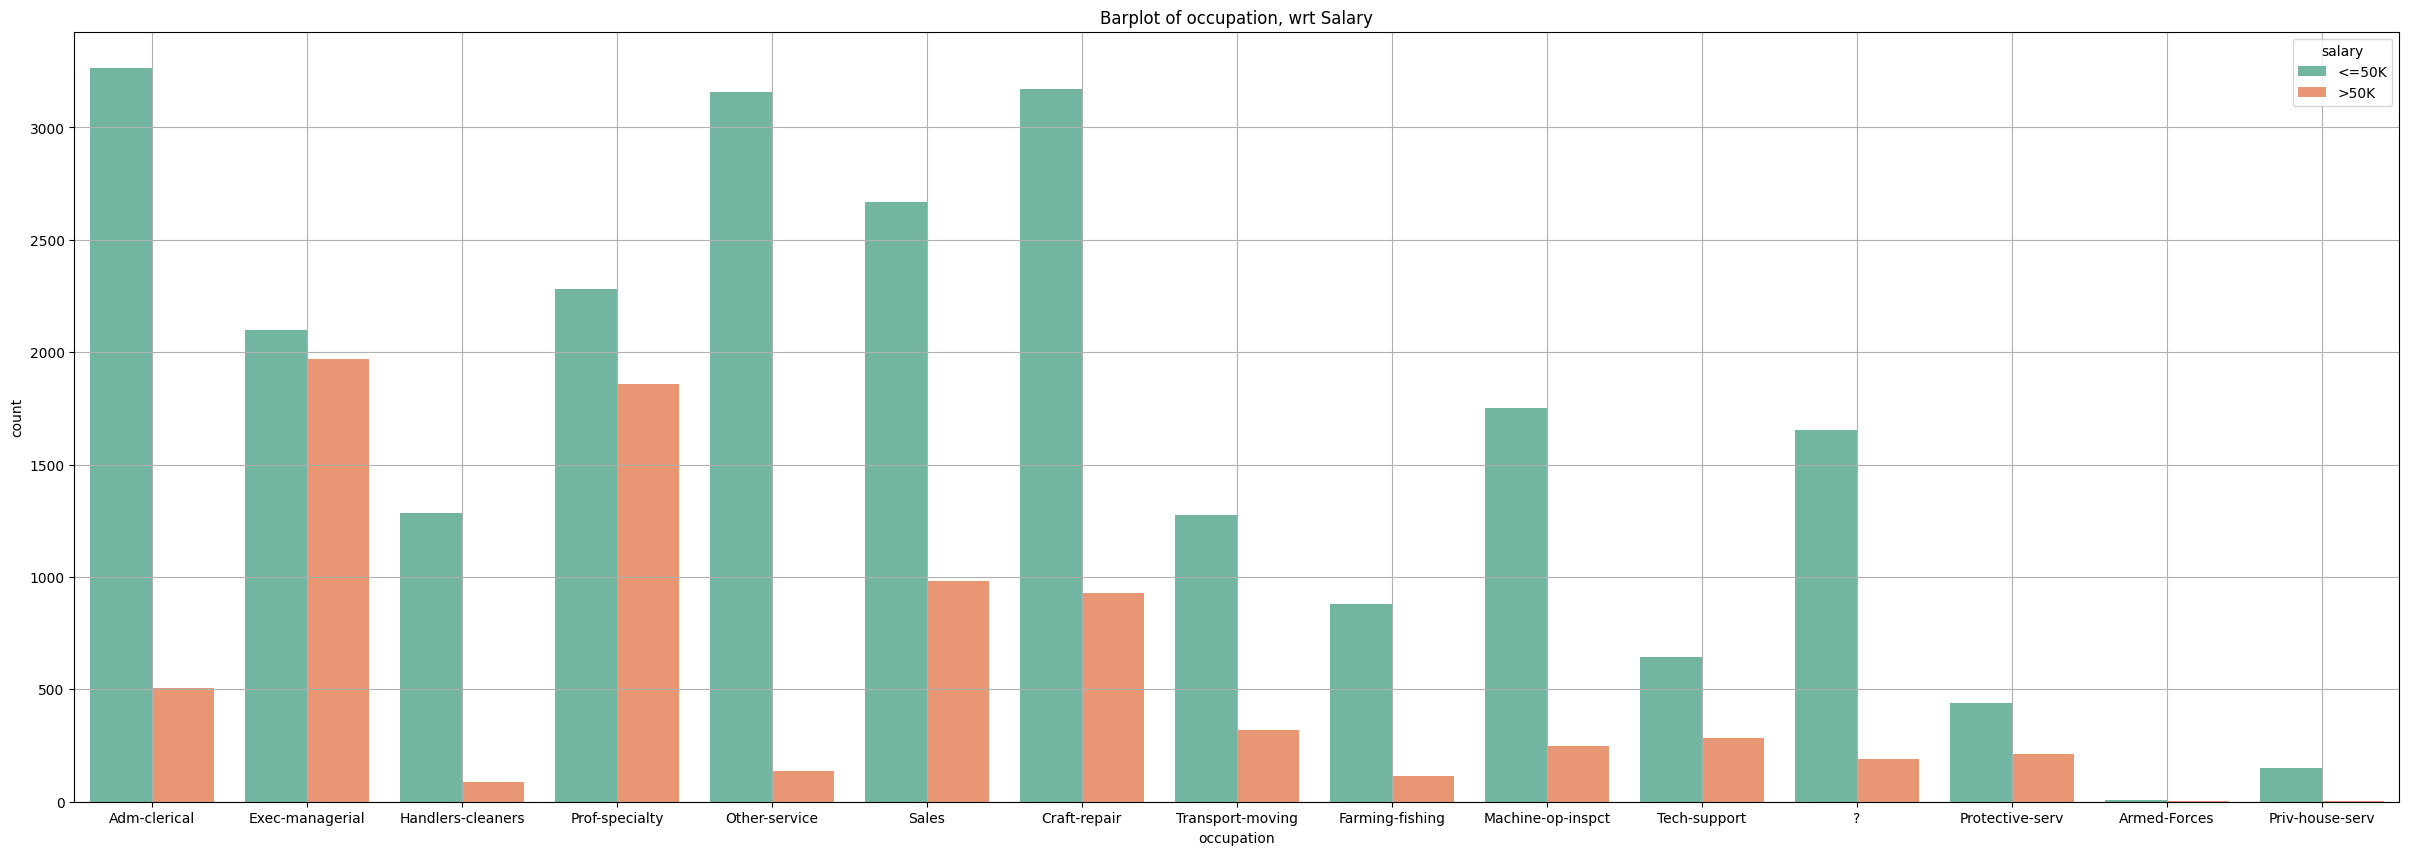

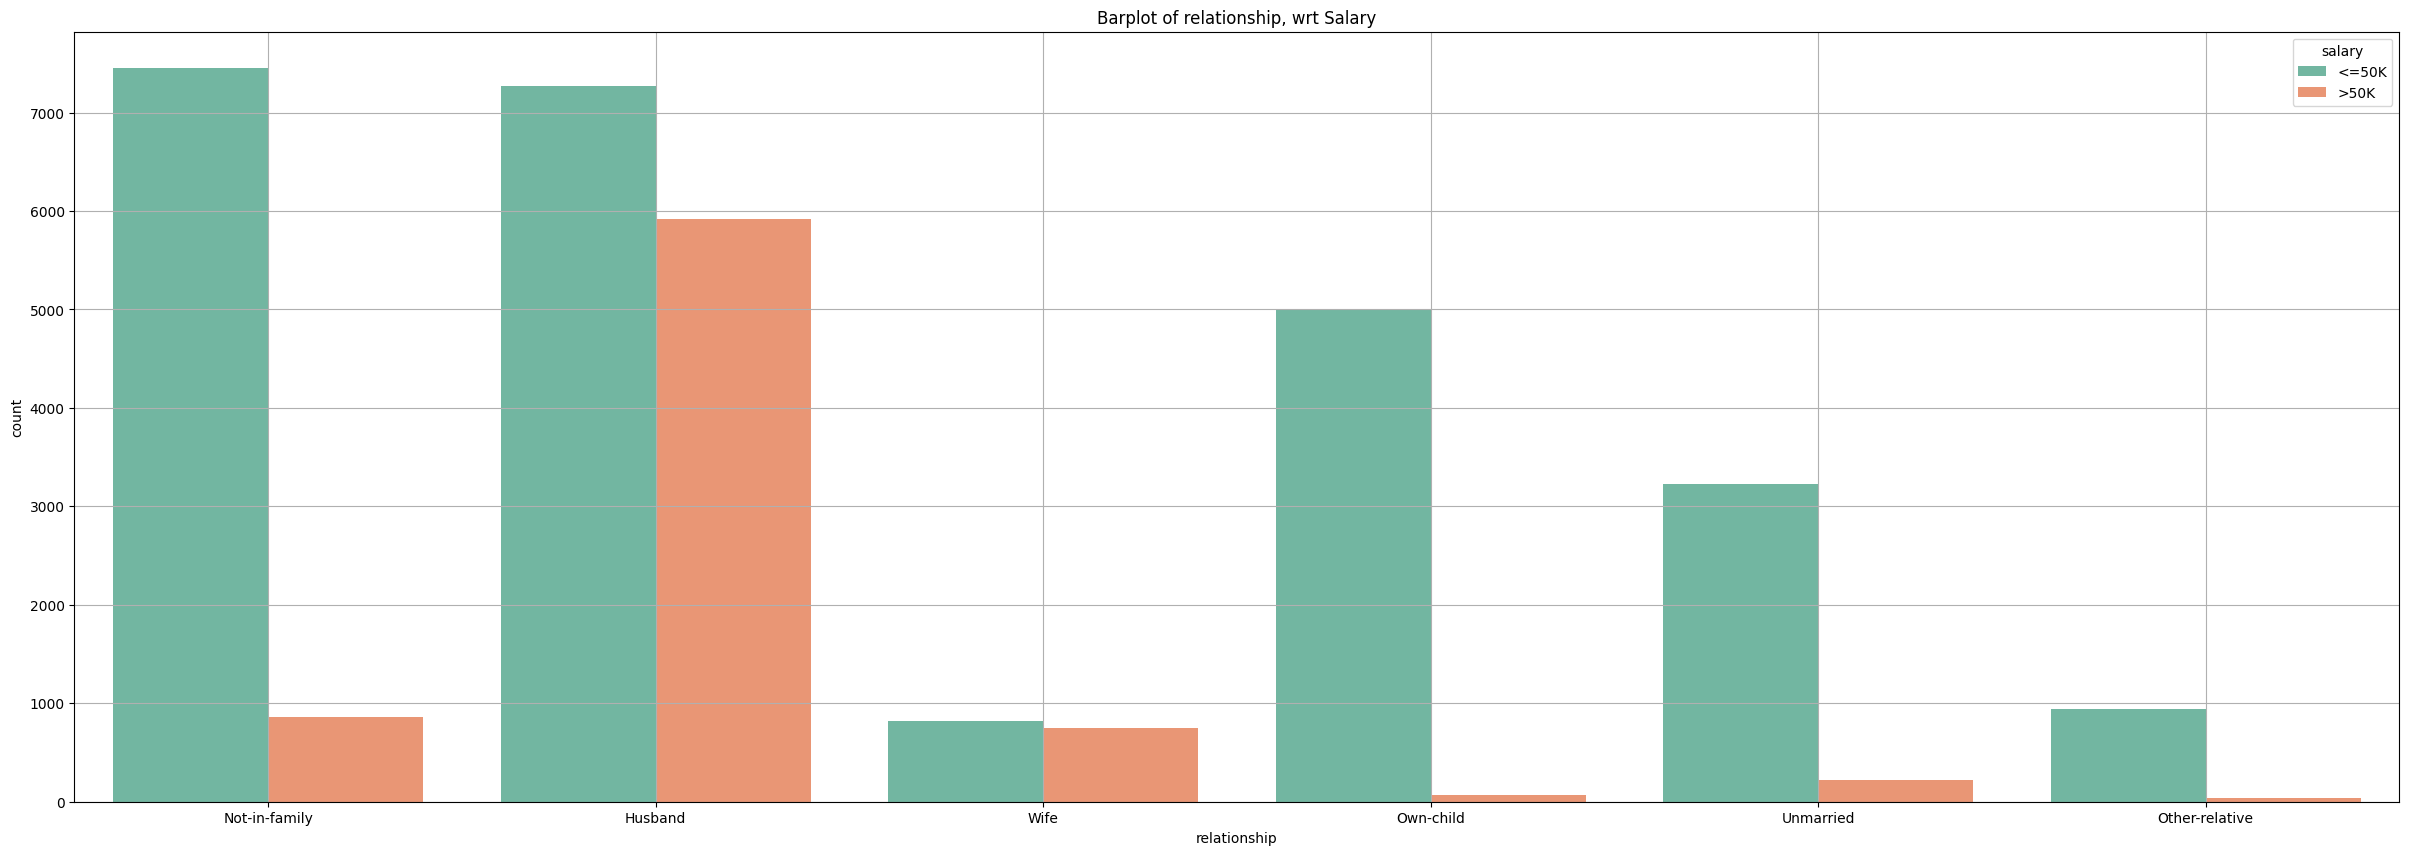

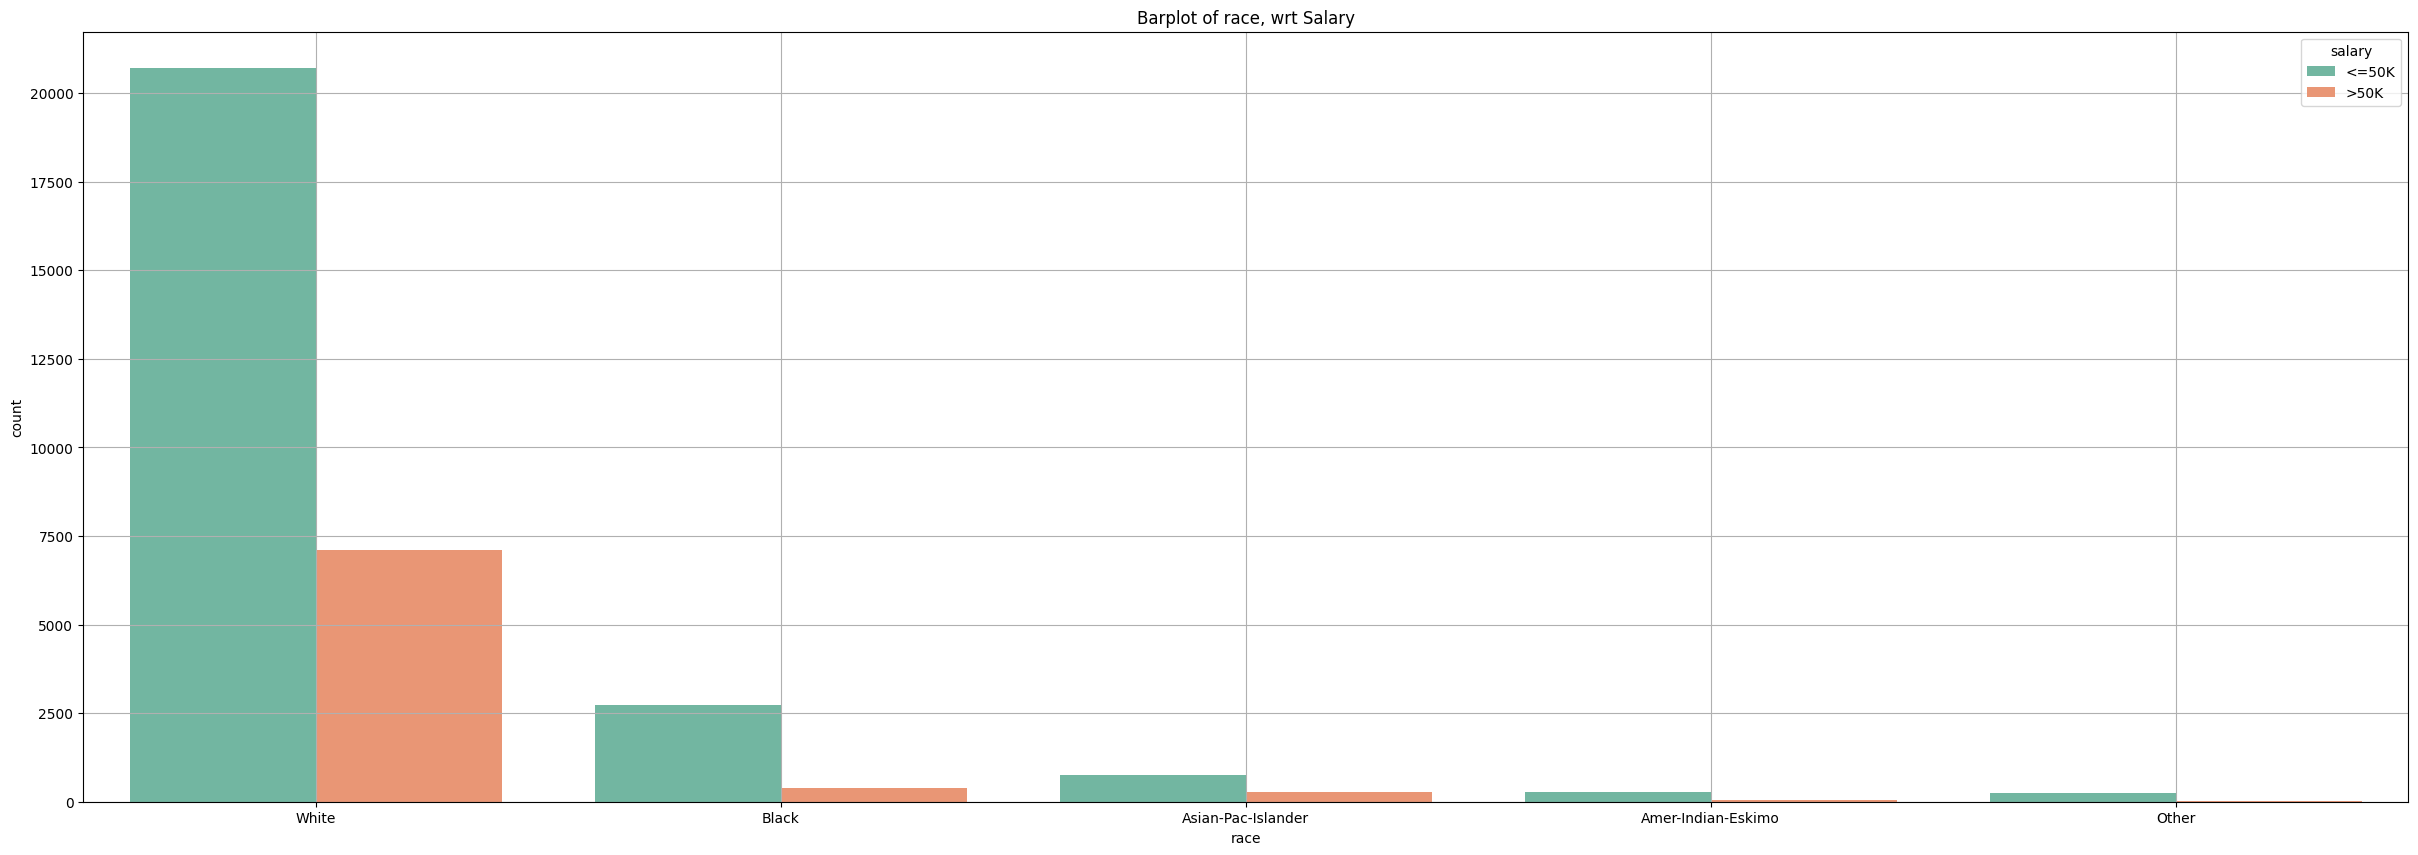

In [40]:
%matplotlib inline

cat_cols = ['workclass', 'education', 'marital-status', 
            'occupation', 'relationship', 'race']

for feature in cat_cols:
    fig = plt.figure(figsize = (30,10))
    
    sns.countplot(x = feature, hue = 'salary', data = df, palette = 'Set2')
    plt.title('Barplot of {}, wrt Salary'.format(feature))
    plt.grid()
    plt.show()

<Figure size 2000x2000 with 0 Axes>

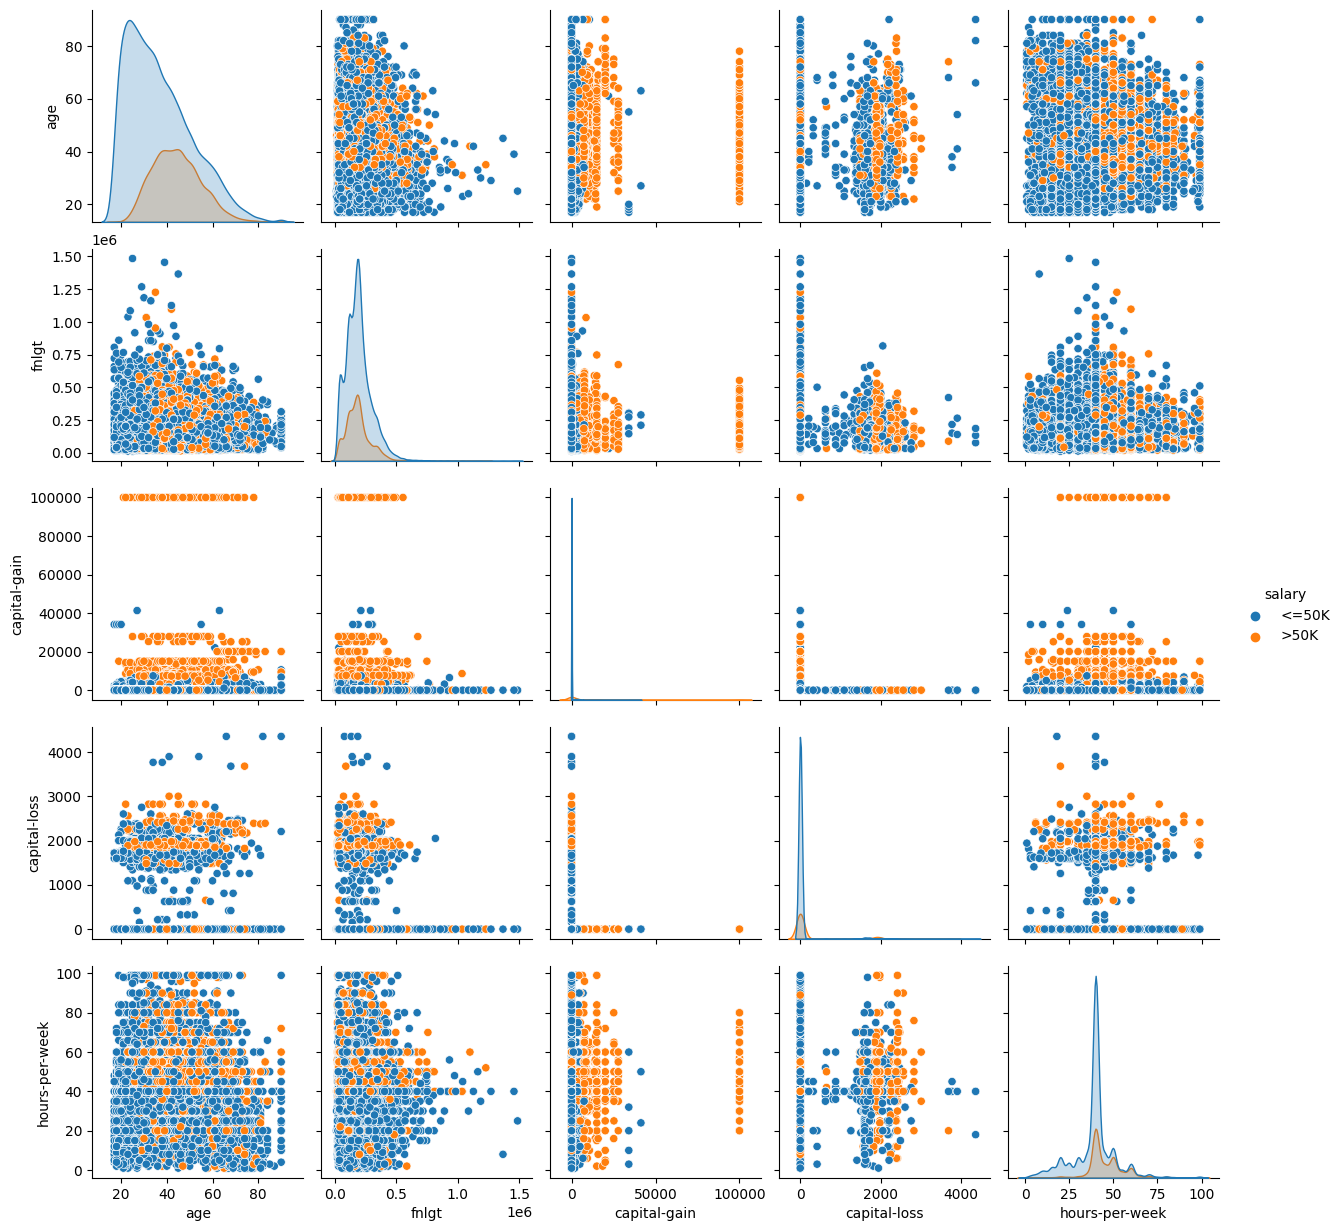

In [42]:
%matplotlib inline
plt.figure(figsize = (20, 20))

sns.pairplot(df, vars = Integer_vals, hue = 'salary')
plt.show()

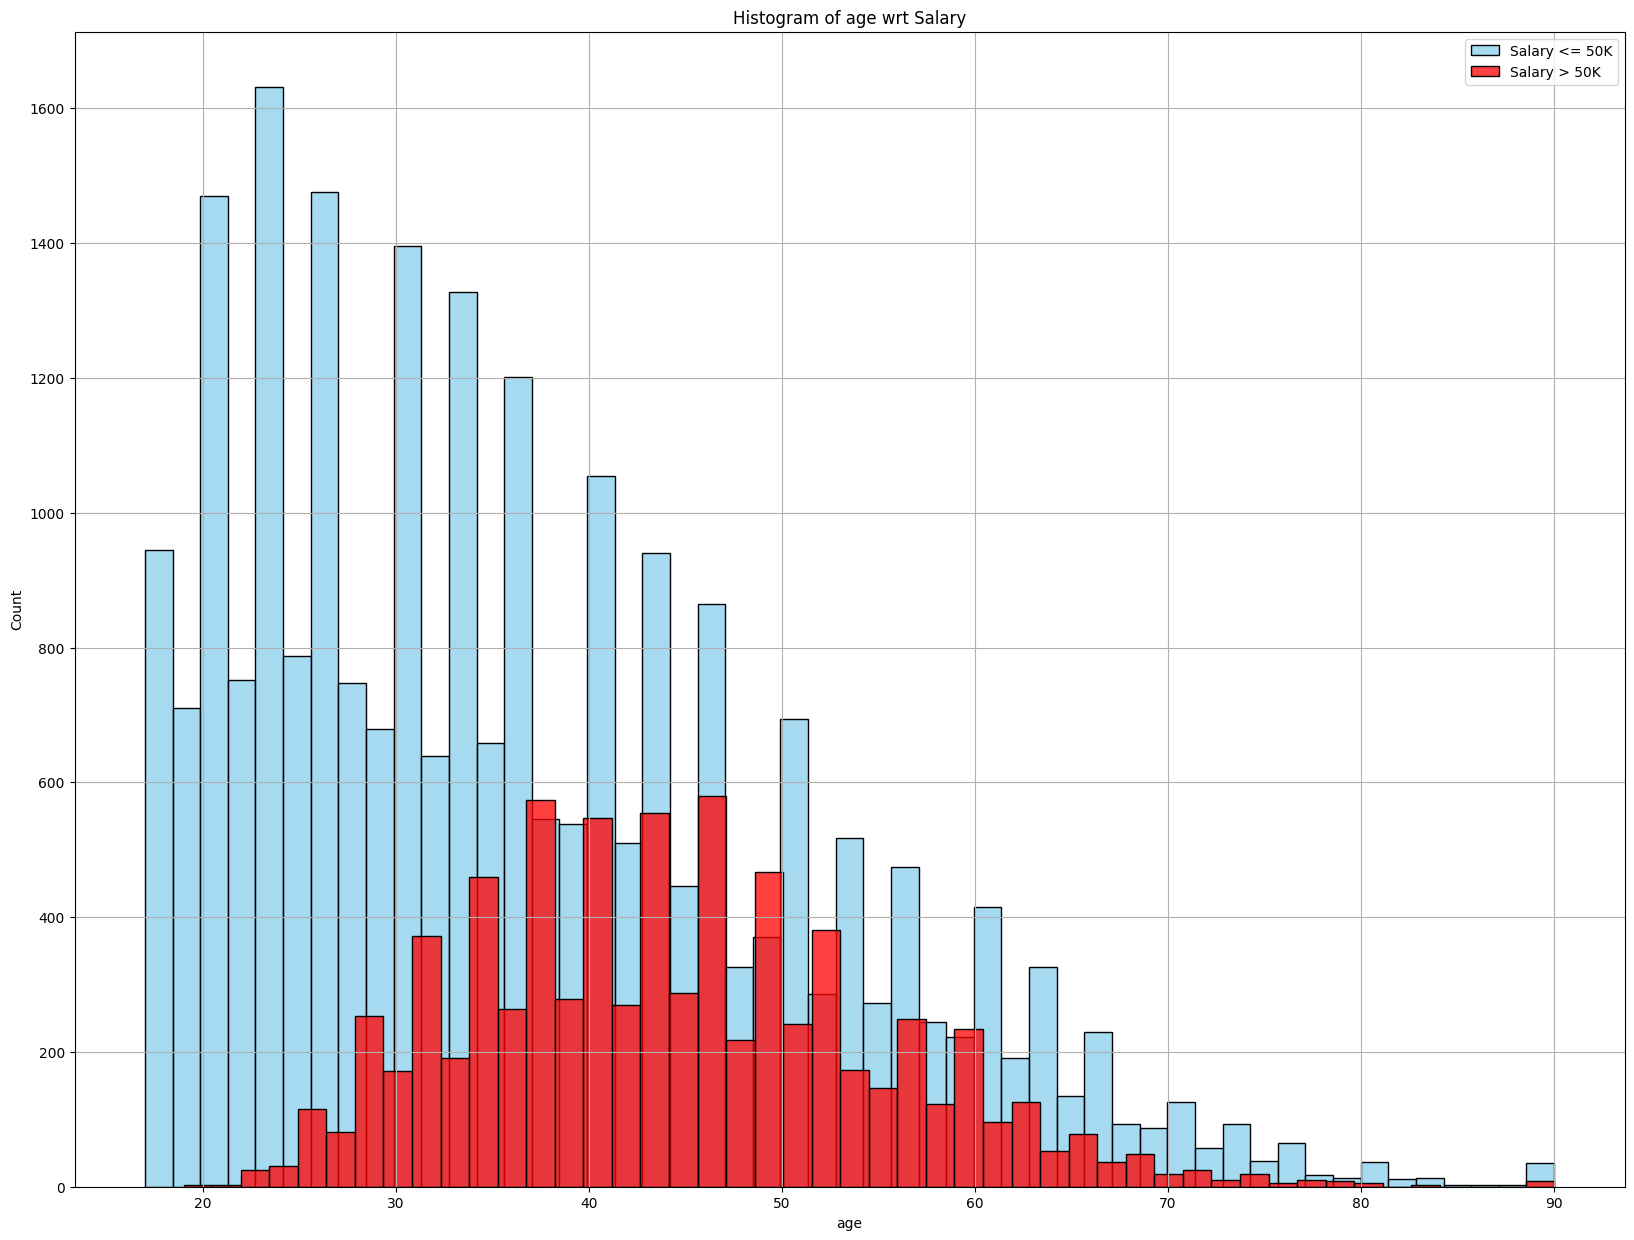

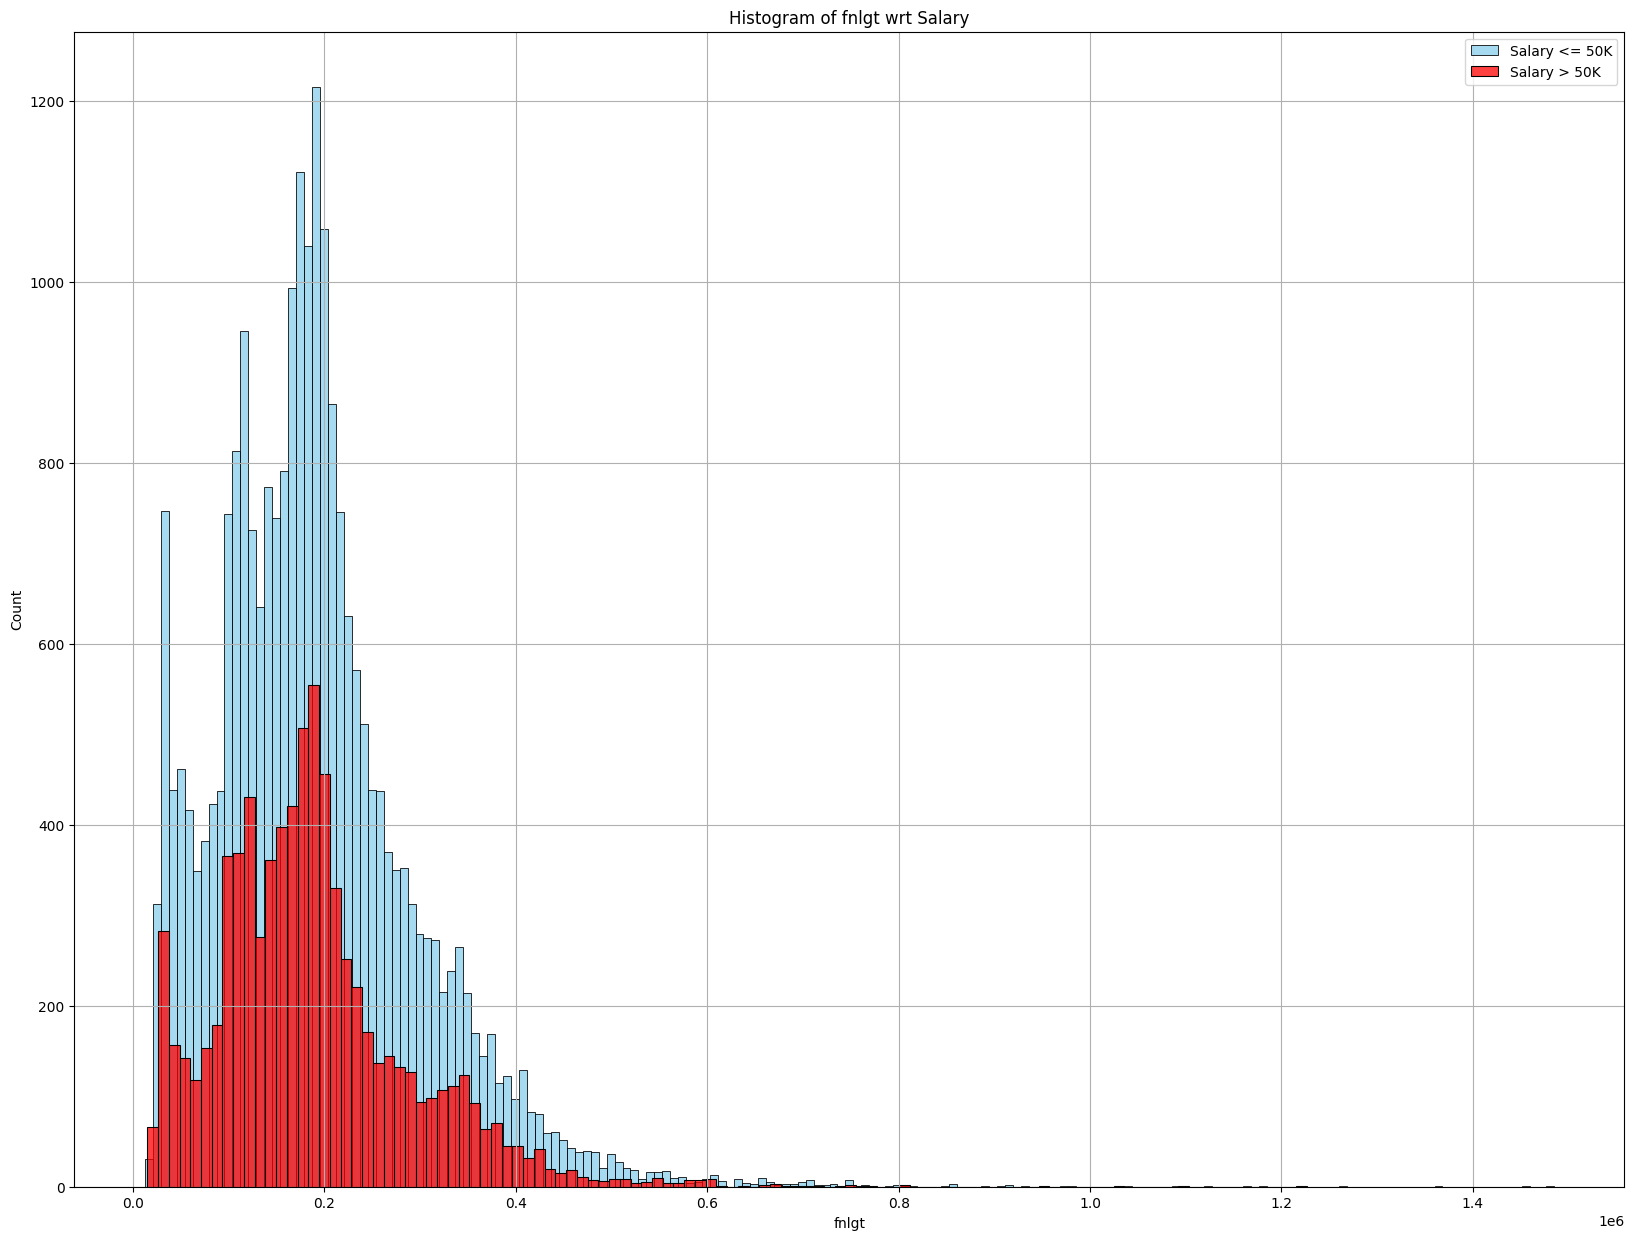

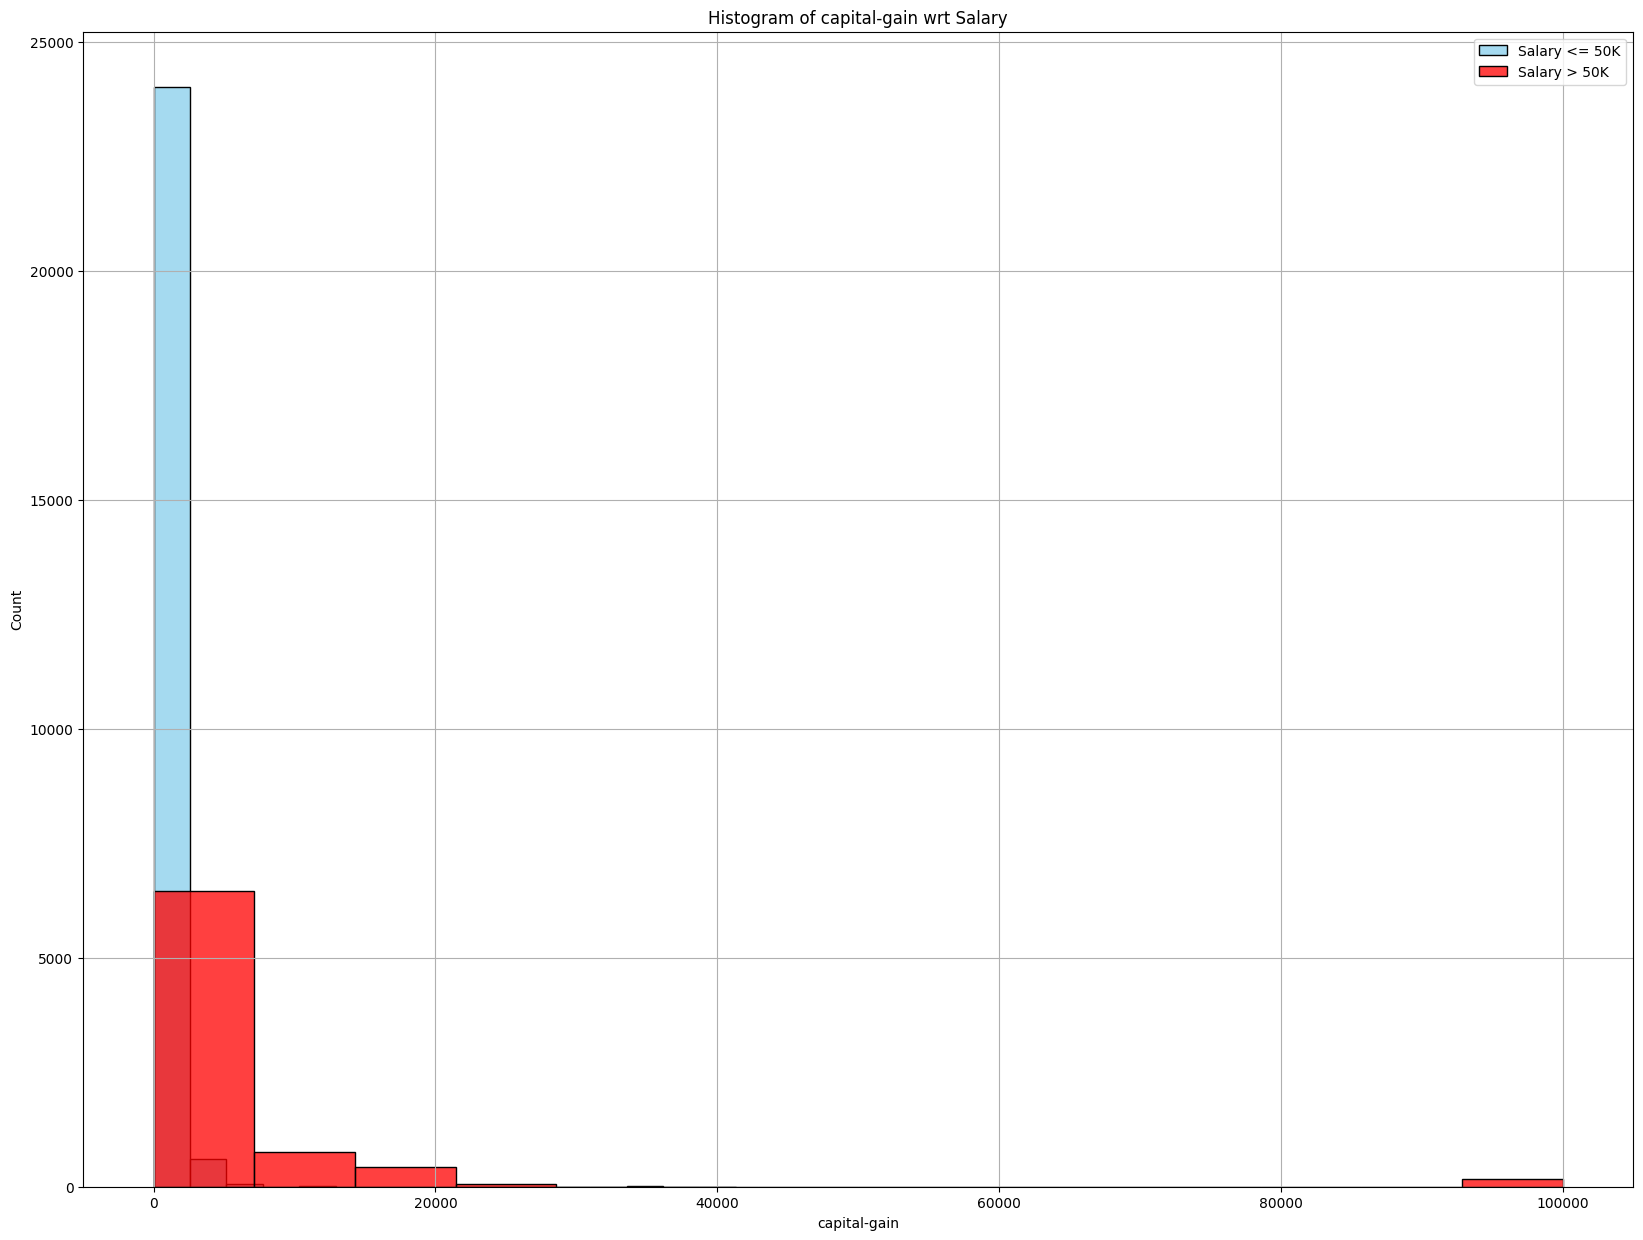

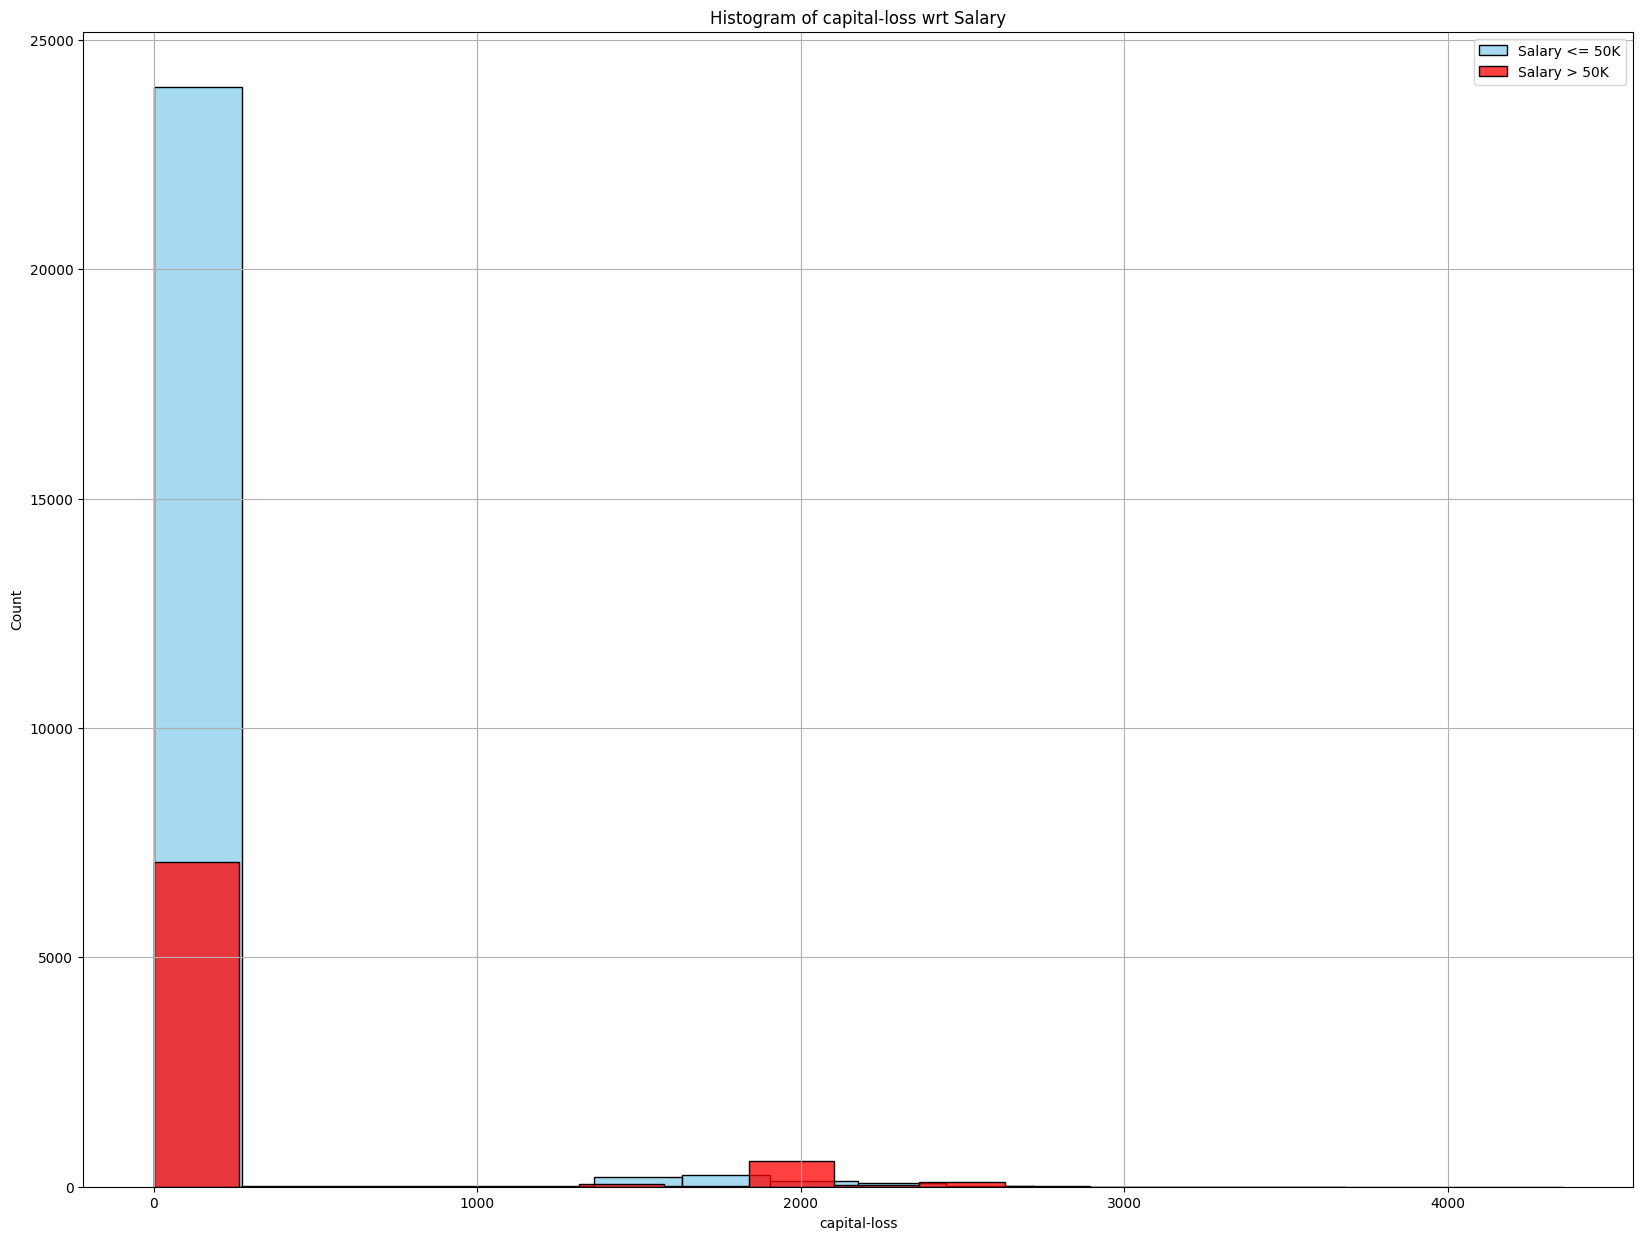

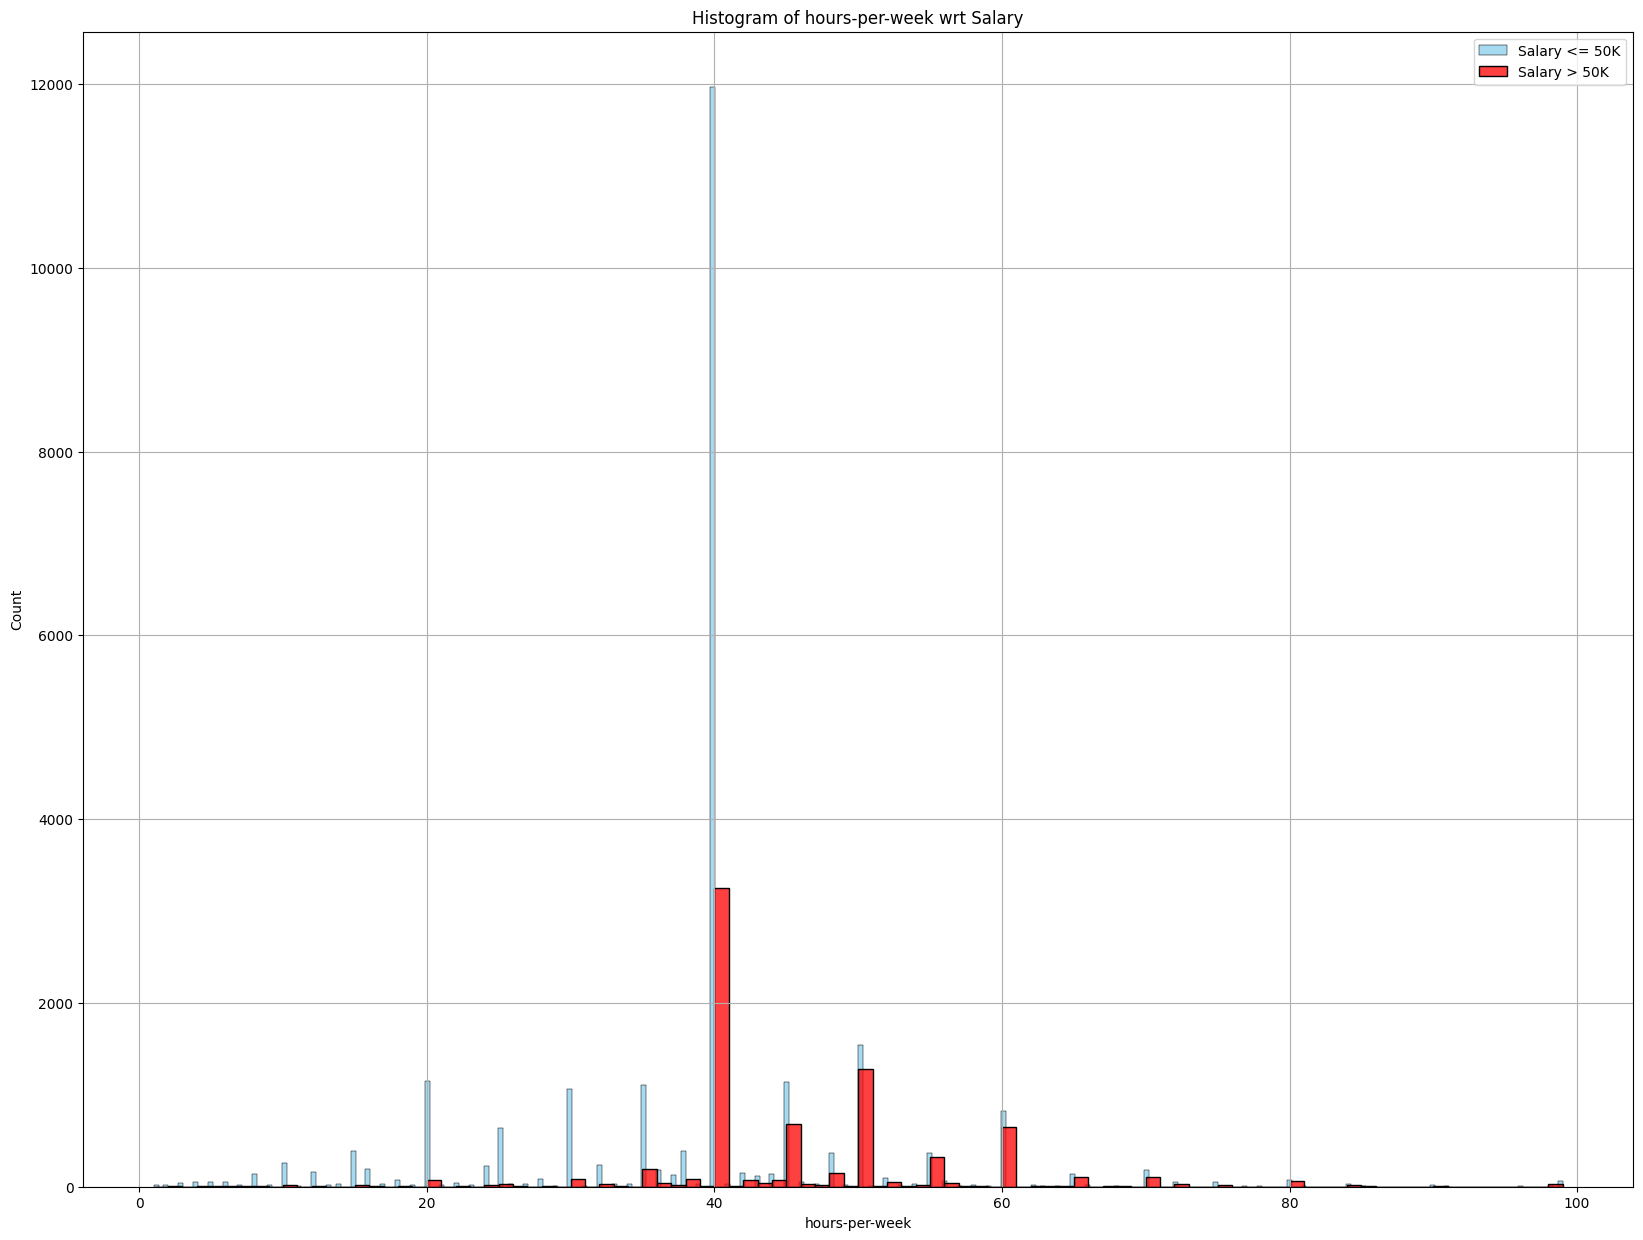

In [46]:
%matplotlib inline

df_lower = df[df['salary'] == '<=50K']
df_higher = df[df['salary'] == '>50K']

i = 0
for feature in Integer_vals:
    
    fig = plt.figure(figsize = (20,15))
    
    sns.histplot(df_lower[feature], color = 'skyblue', label = 'Salary <= 50K')
    sns.histplot(df_higher[feature], color = 'red', label = 'Salary > 50K')
    plt.title('Histogram of {} wrt Salary'.format(feature))
    plt.grid()
    plt.legend()
    
    i = i + 1
    
    plt.show()